In [1]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)


   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

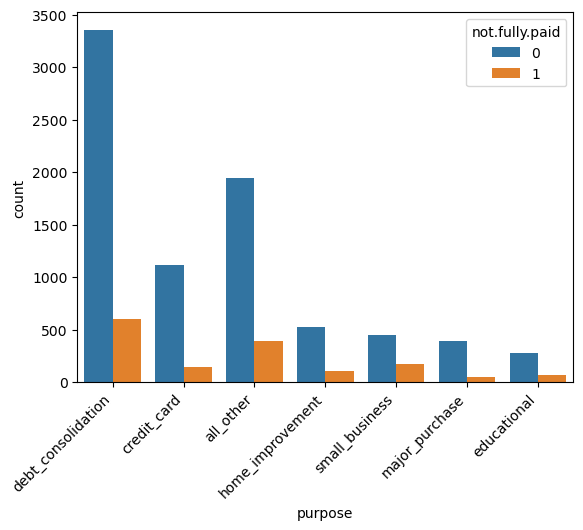

In [3]:
#Dataset Exploration and Visualization
df = pd.read_csv('loan_data.csv')

# Data exploration
print(df.head())
print(df.info())

# Data visualization
sns.countplot(data=df, x='purpose', hue='not.fully.paid')
plt.xticks(rotation=45, ha='right')
plt.show()


In [4]:
#Data Preprocessing
pre_df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

X = pre_df.drop('not.fully.paid', axis=1)
y = pre_df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)


In [5]:
#Model Training using GaussianNB
model_gaussian = GaussianNB()
model_gaussian.fit(X_train, y_train)


GaussianNB()

In [6]:
#Model Evaluation for GaussianNB
y_pred_gaussian = model_gaussian.predict(X_test)
accuracy_gaussian = accuracy_score(y_pred_gaussian, y_test)
f1_gaussian = f1_score(y_pred_gaussian, y_test, average="weighted")

print("GaussianNB Accuracy:", accuracy_gaussian)
print("GaussianNB F1 Score:", f1_gaussian)


GaussianNB Accuracy: 0.8206263840556786
GaussianNB F1 Score: 0.8686606980013266


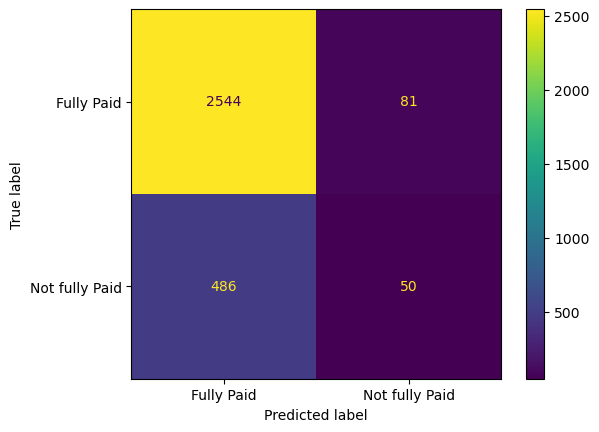

In [8]:
#Confusion Matrix for GaussianNB
labels = ["Fully Paid", "Not fully Paid"]
cm_gaussian = confusion_matrix(y_test, y_pred_gaussian)
disp_gaussian = ConfusionMatrixDisplay(confusion_matrix=cm_gaussian, display_labels=labels)
disp_gaussian.plot()
plt.show()


In [9]:
#Model Training using MultinomialNB with Laplacian Correction

model_multinomial = MultinomialNB(alpha=1.0)  # Laplacian Correction with alpha=1.0
model_multinomial.fit(X_train, y_train)


MultinomialNB()

In [10]:
#Model Evaluation for MultinomialNB
y_pred_multinomial = model_multinomial.predict(X_test)
accuracy_multinomial = accuracy_score(y_pred_multinomial, y_test)
f1_multinomial = f1_score(y_pred_multinomial, y_test, average="weighted")

print("MultinomialNB Accuracy:", accuracy_multinomial)
print("MultinomialNB F1 Score:", f1_multinomial)


MultinomialNB Accuracy: 0.6678266371401456
MultinomialNB F1 Score: 0.640426265085445


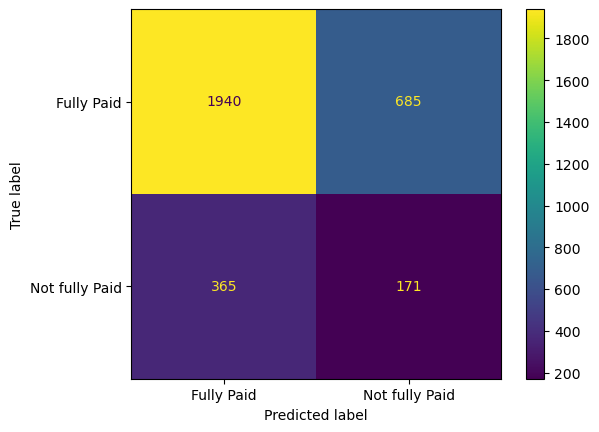

In [11]:
#Confusion Matrix for MultinomialNB
cm_multinomial = confusion_matrix(y_test, y_pred_multinomial)
disp_multinomial = ConfusionMatrixDisplay(confusion_matrix=cm_multinomial, display_labels=labels)
disp_multinomial.plot()
plt.show()
